### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Data Collection
import pandas_datareader as pdr
key=""

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key='155534f2a9bd5abcafe25dd803a58bbc5b9fcf0a')

D:\anaconda\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-11 00:00:00+00:00,223.85,224.30,216.56,218.01,35749049,53.593237,53.700974,51.847895,52.195048,142996196,0.0,1.0
1,AAPL,2018-09-12 00:00:00+00:00,221.07,225.00,219.84,224.94,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0
2,AAPL,2018-09-13 00:00:00+00:00,226.41,228.35,222.57,223.52,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
3,AAPL,2018-09-14 00:00:00+00:00,223.84,226.84,222.52,225.75,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0
4,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-09-01 00:00:00+00:00,189.46,189.920,188.28,189.485,45766503,189.46,189.920,188.28,189.485,45766503,0.0,1.0
1253,AAPL,2023-09-05 00:00:00+00:00,189.70,189.980,187.61,188.280,45280027,189.70,189.980,187.61,188.280,45280027,0.0,1.0
1254,AAPL,2023-09-06 00:00:00+00:00,182.91,188.850,181.47,188.400,81755816,182.91,188.850,181.47,188.400,81755816,0.0,1.0
1255,AAPL,2023-09-07 00:00:00+00:00,177.56,178.210,173.54,175.180,112488803,177.56,178.210,173.54,175.180,112488803,0.0,1.0
1256,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.350,65602066,178.18,180.239,177.79,178.350,65602066,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       223.85
1       221.07
2       226.41
3       223.84
4       217.88
         ...  
1252    189.46
1253    189.70
1254    182.91
1255    177.56
1256    178.18
Name: close, Length: 1257, dtype: float64

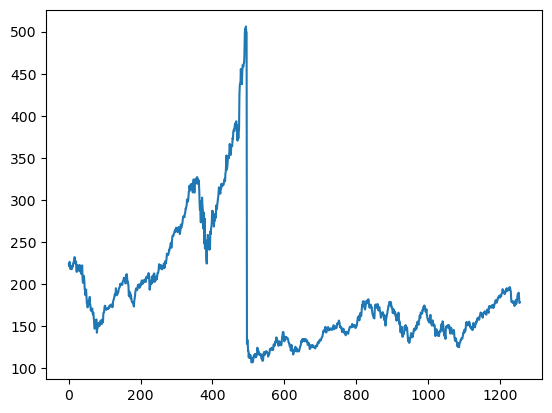

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       223.85
1       221.07
2       226.41
3       223.84
4       217.88
         ...  
1252    189.46
1253    189.70
1254    182.91
1255    177.56
1256    178.18
Name: close, Length: 1257, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

now df1 is converted into an array 

In [15]:
print(df1)

[[0.29307451]
 [0.28611146]
 [0.29948654]
 ...
 [0.19053225]
 [0.17713212]
 [0.17868503]]


In [16]:
##splitting dataset into train and test split
## we split like this bcs this is a time series problem hence indexes are dependant on eachother, therefore, just take percentage of the whole data
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(1005, 252)

In [18]:
train_data

array([[0.29307451],
       [0.28611146],
       [0.29948654],
       ...,
       [0.12265498],
       [0.11944897],
       [0.12303068]])

In [19]:
import numpy
# below code is for selecing time steps 
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(904, 100)
(904,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [23]:
# now we reshape the Xtrain and Xtest because lstm uses 3 inpputs. we already had 2 so we add 1 at the last.  [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(150))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          60400     
                                                                 
 lstm_2 (LSTM)               (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 221,551
Trainable params: 221,551
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          60400     
                                                                 
 lstm_2 (LSTM)               (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 221,551
Trainable params: 221,551
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=30,verbose=1)

Epoch 1/30
31/31 [==============================] - 12s 252ms/step - loss: 0.0136 - val_loss: 0.0014
Epoch 2/30
31/31 [==============================] - 5s 168ms/step - loss: 0.0071 - val_loss: 1.6948e-04
Epoch 3/30
31/31 [==============================] - 5s 145ms/step - loss: 0.0045 - val_loss: 7.0911e-04
Epoch 4/30
31/31 [==============================] - 7s 227ms/step - loss: 0.0040 - val_loss: 3.3125e-04
Epoch 5/30
31/31 [==============================] - 4s 144ms/step - loss: 0.0037 - val_loss: 3.7521e-04
Epoch 6/30
31/31 [==============================] - 5s 162ms/step - loss: 0.0041 - val_loss: 4.0200e-04
Epoch 7/30
31/31 [==============================] - 4s 140ms/step - loss: 0.0028 - val_loss: 6.1745e-04
Epoch 8/30
31/31 [==============================] - 4s 145ms/step - loss: 0.0035 - val_loss: 1.2919e-04
Epoch 9/30
31/31 [==============================] - 5s 147ms/step - loss: 0.0030 - val_loss: 2.4643e-04
Epoch 10/30
31/31 [==============================] - 5s 154ms/step 

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.11.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 37ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics for trained data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

206.8548397288694

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

167.5890774344579

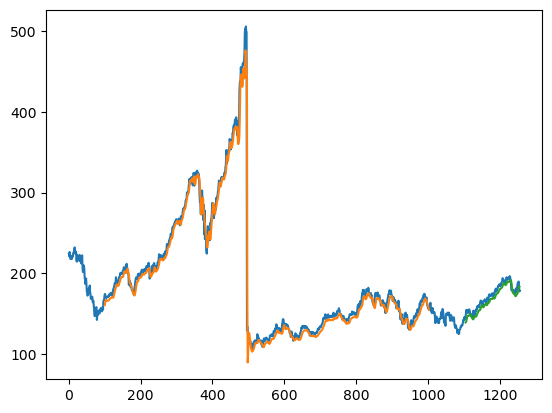

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

252

In [37]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape


(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19

In [40]:
# demonstrate f forecasting next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17881802]
101
1 day input [0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 

9 day output [[0.14832461]]
10 day input [0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419
 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902 0.20348153
 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645
 0.21613024 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567
 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793
 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105
 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557
 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451
 0.20295554 0.20693801

18 day output [[0.11891718]]
19 day input [0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.17881802 0.17375641 0.16992748
 0.16668408 0.1636579

27 day output [[0.09150054]]
28 day input [0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419
 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902 0.20348153
 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645
 0.21613024 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567
 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793
 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105
 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557
 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451
 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212 0.17868503
 0.17881802 0.17375641 0.16992748 0.16668408 0.1636579  0.16068184
 0.15768322 0.15462995 0.15151004 0.14832461 0.14508343 0.14180169
 0.13849656 0.1351847

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df1)

1257

ValueError: x and y must have same first dimension, but have shapes (100,) and (99, 1)

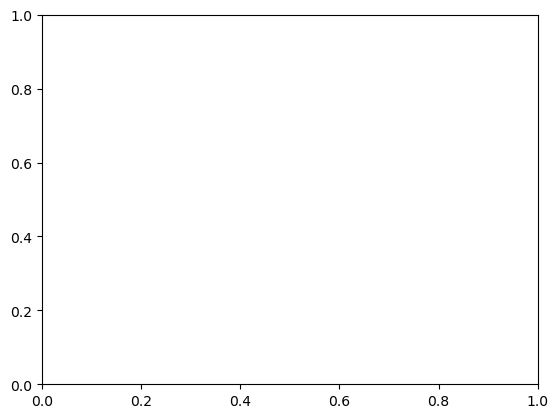

In [44]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)